In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve

# 資料預處理

In [132]:
import numpy as np
import pandas as pd
import os

filepath = '/Users/mac/Desktop/Kaggle_datasets/Creditcardfraud/'
filename01 = 'creditcard.csv'

df_full = pd.read_csv(os.path.join(filepath, filename01))

In [133]:
df_full.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [134]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [135]:
df_full.Class.value_counts() ##可以看到positive比例超級低約莫0.2%，直接跑DL會有偵測不到positive全部猜negative的危險

0    284315
1       492
Name: Class, dtype: int64

In [136]:
df_full.sort_values(by='Class', ascending=False, inplace=True)
df_full.drop('Time', axis=1,  inplace = True)

In [137]:
df_full.head() ##記住，第index值492以後都是false，方便我們分層抽樣

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42635,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1
135718,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,-1.886176,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57,1
10568,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,-11.627194,...,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.00,1
215132,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,-6.428231,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,723.21,1
144104,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,-2.848923,-5.995676,...,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1.00,1


### Stratified sampling: 盡量讓0和1平衡

In [138]:
df_sample = df_full.iloc[:3000,:]
df_sample.Class.value_counts()

0    2508
1     492
Name: Class, dtype: int64

In [139]:
feature = np.array(df_sample.values[:,0:29])
label = np.array(df_sample.values[:,-1])

### Shuffle

In [140]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df_sample, random_state=42)

df_train = shuffle_df[0:2400]
df_test = shuffle_df[2400:]

In [141]:
train_feature = np.array(df_train.values[:,0:29])
train_label = np.array(df_train.values[:,-1])
test_feature = np.array(df_test.values[:,0:29])
test_label = np.array(df_test.values[:,-1])

In [142]:
train_feature[0]

array([  1.78539895e+00,  -4.99110872e-01,  -1.10643579e+00,
         8.10469959e-01,  -2.54238744e-01,  -8.65974408e-01,
         2.86934018e-01,  -3.86715309e-01,   6.36815005e-01,
        -5.72996844e-02,  -8.51014437e-01,   1.19107437e+00,
         1.35199869e+00,  -2.35543199e-01,  -7.53558239e-01,
        -4.95546835e-01,  -1.67350853e-01,  -6.77521994e-01,
         1.90872945e-02,   1.12078176e-01,   1.63670598e-01,
         5.52143372e-01,  -7.45725294e-02,   1.58891016e-01,
         1.27665160e-01,   4.35472647e-01,  -6.26011145e-02,
        -3.88373004e-02,   1.34900000e+02])

In [143]:
train_feature.shape

(2400, 29)

In [144]:
train_label

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [145]:
train_label.shape

(2400,)

In [146]:
test_feature.shape

(600, 29)

In [147]:
test_label.shape

(600,)

### MinMaxScaler，整個data數據的Scaler要統一！！

In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

In [149]:
train_feature_trans

array([[  9.82156380e-01,   5.27321914e-01,   8.69444108e-01, ...,
          5.48411387e-01,   7.30875746e-01,   2.02769022e-02],
       [  9.89959437e-01,   5.34773829e-01,   8.15873450e-01, ...,
          5.50208556e-01,   7.30399414e-01,   1.33776449e-04],
       [  9.91705562e-01,   5.19128748e-01,   8.19855663e-01, ...,
          5.47815341e-01,   7.21721505e-01,   7.21490961e-03],
       ..., 
       [  9.10379993e-01,   5.76097489e-01,   8.74847636e-01, ...,
          6.04493673e-01,   7.58840205e-01,   2.54926806e-03],
       [  8.86087957e-01,   5.82359750e-01,   8.84877892e-01, ...,
          5.98549630e-01,   7.75156119e-01,   2.97615021e-04],
       [  8.59561549e-01,   5.03816662e-01,   9.52710972e-01, ...,
          5.51849296e-01,   7.64848793e-01,   6.04774767e-02]])

# 跑模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 200)               6000      
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 201       
Total params: 46,401
Trainable params: 46,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 479 samples, validate on 1921 samples
Epoch 1/200
0s - loss: 0.6926 - acc: 0.5261 - val_loss: 0.6834 - val_acc: 0.8360
Epoch

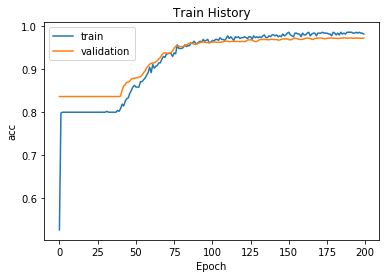

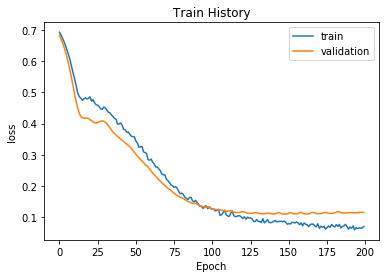

 32/600 [>.............................] - ETA: 0s

accuracy= 0.98
 32/600 [>.............................] - ETA: 2s

In [150]:
######################### 建立模型
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import matplotlib.pyplot as plt 
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential() #一層一層到底，按順序

#輸入層（隱藏層1）
model.add(Dense(units=200, 
                input_dim=29, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#隱藏層2，不用寫input_dim，因為就是前一層的units
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#輸出層
model.add(Dense(units=1, #輸出一個數字 
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary()) #可以清楚看到model還有參數數量

model.compile(loss='binary_crossentropy',   #二元用binary
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label,  #上面多分割一步在keras是內建的
                          validation_split=0.8, epochs=200, 
                          batch_size=500, verbose=2) #verbose=2表示顯示訓練過程

######################### 訓練過程視覺化
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(test_feature_trans)

#儲存訓練結果
#model.save_weights("Keras_CreditCardFraud_MLP.h5")
#print('model saved to disk')

# Train/Test Score

In [151]:
df_ans = pd.DataFrame({'Real Class' :test_label})
df_ans['Prediction'] = prediction

In [152]:
df_ans[ df_ans['Real Class'] != df_ans['Prediction'] ]

,Real Class,Prediction
110,1.0,0
163,0.0,1
224,1.0,0
265,0.0,1
283,0.0,1
308,1.0,0
345,1.0,0
357,1.0,0
378,1.0,0
484,0.0,1


In [153]:
df_ans['Prediction'].value_counts() #分層之後，0和1參半，是好現象

0    521
1     79
Name: Prediction, dtype: int64

In [154]:
df_ans['Real Class'].value_counts()

0.0    519
1.0     81
Name: Real Class, dtype: int64

In [155]:
prediction_train = model.predict_classes(train_feature_trans)

1376/2400 [================>.............] - ETA: 0s

In [156]:
df_train_ans = pd.DataFrame({'Real Class' :train_label})
df_train_ans['Prediction'] = prediction_train

In [157]:
df_train_ans[ df_train_ans['Real Class'] != df_train_ans['Prediction'] ]

,Real Class,Prediction
54,1.0,0
117,1.0,0
252,1.0,0
286,1.0,0
431,1.0,0
448,1.0,0
458,1.0,0
704,1.0,0
707,1.0,0
718,0.0,1


In [158]:
df_train_ans['Prediction'].value_counts()

0    2034
1     366
Name: Prediction, dtype: int64

In [159]:
df_train_ans['Real Class'].value_counts()

0.0    1989
1.0     411
Name: Real Class, dtype: int64

# Confusion Matrix

total test case number:  600


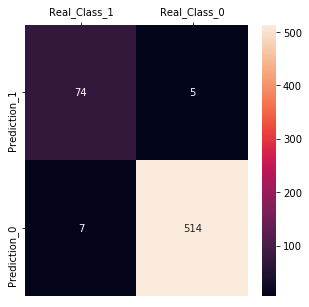

In [160]:
import seaborn as sns
%matplotlib inline

cols = ['Real_Class_1','Real_Class_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B1P0 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B0P1 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 0)])
B0P0 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 0)])

conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(conf))

In [161]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

total_num:  600
G1P1:  74
G0P1:  5
G1P0:  7
G0P0:  514
##########################
sensitivity:  0.913580246914
specificity:  0.986564299424
false_positive_rate:  0.00963391136802
false_negative_rate:  0.0864197530864


(600,
 0.9135802469135802,
 0.98656429942418422,
 0.0096339113680154135,
 0.086419753086419748)

# 分層抽樣才有可能達到好的預測效果?

## 以下實驗拿這個分層做出來的模型去預測大部分為0的數據，預設是false positive rate高

In [220]:
df_sample2 = df_full.iloc[:,:] #由於都是label=0，就不shuffle了

feature2 = np.array(df_sample2.values[:,0:29])
label2 = np.array(df_sample2.values[:,-1])

feature2_trans = scaler.transform(feature2)

######################### 實際測驗得分
scores = model.evaluate(feature2_trans, label2)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction2 = model.predict_classes(feature2_trans)

284640/284807 [============================>.] - ETA: 0s

accuracy= 0.988318405095
284352/284807 [============================>.] - ETA: 0s

In [221]:
unique, counts = np.unique(prediction2, return_counts=True)

In [222]:
unique, counts ##結果相當不錯！！

(array([0, 1], dtype=int32), array([281108,   3699]))

In [223]:
prediction2_list = prediction2.reshape(-1).astype(int)

In [224]:
label2_list = label2.astype(int)

In [225]:
print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99    284315
          1       0.12      0.88      0.21       492

avg / total       1.00      0.99      0.99    284807

[[281048   3267]
 [    60    432]]


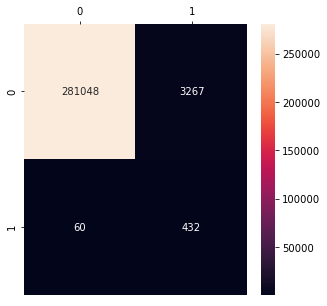

In [226]:
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

In [227]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

total_num:  284807
G1P1:  281048
G0P1:  3267
G1P0:  60
G0P0:  432
##########################
sensitivity:  0.999786558903
specificity:  0.878048780488
false_positive_rate:  0.883211678832
false_negative_rate:  0.000213441097372


(284807,
 0.99978655890262813,
 0.87804878048780488,
 0.88321167883211682,
 0.00021344109737182862)

# 分層抽樣在小樣本數有效，加大樣本時false positive也並沒有很誇張的跑出來！！

## 總樣本28萬筆約有500筆詐騙，我們的模型可以揪出候選的3500筆資料，是個不錯的權衡！